## Q2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([2, 4, 6, -2, -4, -6])
y = np.array([2.5, 5.8, 3.7, -1.1, -3.7, -5.0])

In [3]:
# set params
beta_t = 0
gradient_t = 0
alpha = 0.001
epsilon = 1e-4
error = epsilon+1
storage = []
iterations = []
counter = 0

In [4]:
# counter and iterations for visualization
while error > epsilon:
    gradient_t = -2*sum(X * (y - X * (beta_t))) + 2 * 10 * beta_t
    beta_t1 = beta_t - alpha*gradient_t
    error = np.sqrt(np.sum(np.power((beta_t1-beta_t), 2))) # ridge equation
    beta_t = beta_t1
    storage.append(beta_t)
    counter += 1
    iterations.append(counter)

Text(0, 0.5, 'beta_t')

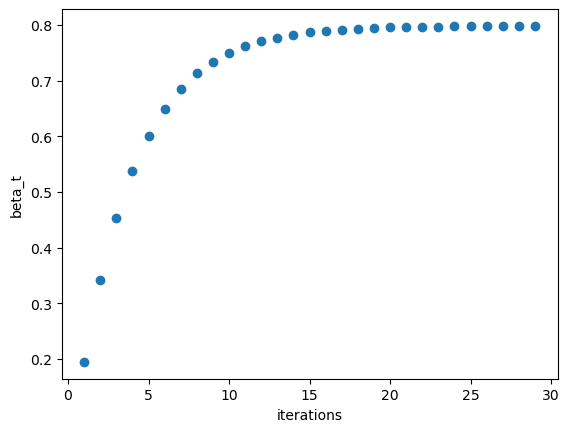

In [5]:
plt.scatter(iterations, storage)
plt.xlabel('iterations')
plt.ylabel('beta_t')

In [6]:
gradient_t

-0.07730351229219323

In [8]:
storage[-1] # last estimate

0.7981211415766685

## Q4.
Dataset retrieved via GitHub https://github.com/emredjan/ISL-python/blob/master/datasets/Auto.csv

In [9]:
import pandas as pd

data = pd.read_csv('C:/Users/ldmag/Downloads/Auto.csv')

In [10]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
# check data types
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [12]:
# check nulls
data.isnull().sum() / len(data) * 100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
year            0.0
origin          0.0
name            0.0
dtype: float64

Note: Found nulls marked as "?" in the horsepower column. Replaced with actual values within the CSV file directly.

In [13]:
response = data['mpg']
predictors = data.drop(['mpg','name'], axis=1)

In [14]:
import statsmodels.api as sm
regressor = sm.OLS(response, predictors)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2985.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:06:28   Log-Likelihood:                         -1043.8
No. Observations:                 397   AIC:                                      2102.
Df Residuals:                     390   BIC:                                      2130.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6886      0.322     -2.136      0.033      -1.322      -0.055
displacement     0.0221      0.008      2.911      0.004       0.007       0.037
horsepower      -0.0406      0.012     -3.321      0.001      -0.065      -0.017
weight          -0.0061      0.001     -9.418      0.000      -0.007      -0.005
acceleration    -0.0848      0.089     -0.952      0.342      -0.260       0.090
year             0.5868      0.024     24.469      0.000       0.540       0.634
origin           1.3104      0.277      4.723      0.000       0.765       1.856
==============================================================================
Omnibus:                       45.120   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.136
Skew:                           0.663   Prob(JB):                     5.37e-19
Kurtosis:                       4.824   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

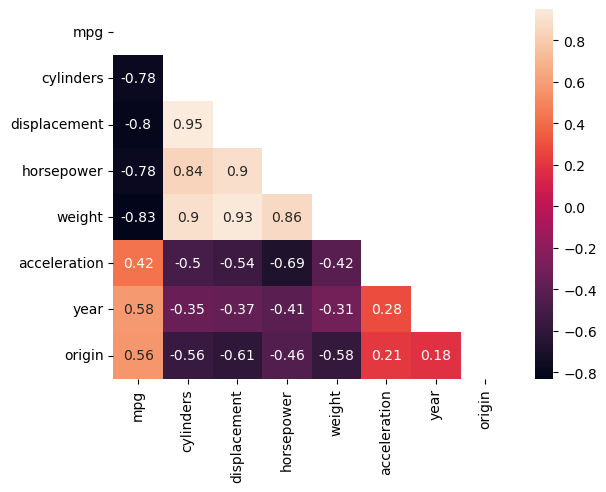

In [15]:
# correlation matrix
import seaborn as sns
c = data.drop(['name'], axis=1).corr()

mask = np.triu(np.ones_like(c, dtype=bool))
sns.heatmap(c, mask=mask, annot=True)